In [55]:
__version__ = '0.3'
__author__  = "Robert Matern (r.matern@stud.uni-hannover.de)"
__date__    = ''
__url__     = ''
__copyright__ = "(C) 2015 Robert Matern"

#Beispieldaten Nr. 1

In [56]:
%run Parameter.ipynb
%run DynamicProgramm.ipynb

Python Version 2.7.9 |Anaconda 2.2.0 (x86_64)| (default, Dec 15 2014, 10:37:34) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Numpy Version 1.9.2
Matplotlib Version 1.4.3
Pandas Version 0.15.2


In [57]:
# Produkte
products = Product(2)

# Ressourcen
resources = Resource(2)

#Kapazität
capacities = Capacity(resources)
capacities[1] = 2
capacities[2] = 1

# Ressourcenverbrauch
consumtions = Consumption(products, resources)
consumtions[1] = [0,1,0]
consumtions[2] = [0,0,1]

# Erträge
revenues = Revenue(products)
revenues[1] = 100
revenues[2] = 200

# Buchungshorizont
times = Time(4)

# Wahrscheinlichkeiten
probs = Prob(products, times)
probs[1] = [0, 0.5, 0.5, 0.5, 0.5]
probs[2] = [0, 0.1, 0.1, 0.1, 0.1]

# Gegenwahrscheinlichkeiten
against_probs = Against_Prob(probs)
probs[0] = against_probs

# Tat. Nachfrage
demands = Demand(products, times)
demands[0] = [0, 1, 1, 1, 1] # Keine Anfragen müssen immer möglich sein!
demands[1] = [0, 1, 0, 0, 0]
demands[2] = [0, 1, 1, 1, 1]

# Systemzustände
conditions = Condition(capacities, resources, times)

# Endzeitpunkte
#end_times = End_Time(conditions)

0:00:00.000340


In [58]:
%time
print DP(solutions, conditions, products, resources, capacities, consumtions, times)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs
231.25


Optimalen Politik zum Zeitpunkt "t" und unter Beachtung der Restkapazitäten "c[h]": 

       Successor  Res_Cap1  Res_Cap2  Time  Best Politic  r[j]-OC[j,c,t]
4     [8, 3, 13]         2         1     4             2          145.81
8        [17, 7]         2         0     3             1           75.00
13  [17, 12, 22]         1         1     3             2          162.00
17      [16, 26]         1         0     2             1           50.00
22      [26, 21]         0         1     2             2          180.00
26          [25]         0         0     1             0            0.00
3     [2, 12, 7]         2         1     3             2          162.00
12  [16, 11, 21]         1         1     2             2          180.00
21      [25, 20]         0         1     1             2          200.00
7        [16, 6]         2         0     2             1          100.00
16      [25, 15]         1         0     1             1          100.00
25         [end]         0         0  

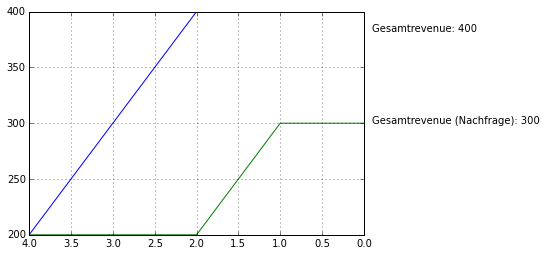

In [59]:
# Erstellung der Struktur als NetworkX-Graph
graph = Structure(solutions, products, consumtions, revenues, probs)

# Ermittlung der besten Politik (Dijkstra Algorithmus)
Best_Politic(graph, times, resources)
Best_Politic_Demand(graph, times, resources, demands)

%time

In [60]:
Best_Path(graph, times)

Kürzester Pfad: [4, 13, 22, 26, 25] 



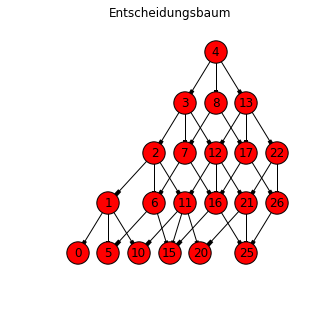

In [61]:
Drawing(graph)